In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt

print("PyTorch Version:", torch.__version__)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

PyTorch Version: 2.8.0


# **1.1 Task**

In [6]:
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

x = torch.Tensor(X)
y = torch.Tensor(Y)

x = x.to(device)
y = y.to(device)

# Compute Gaussian
z = torch.exp(-(x**2+y**2)/2.0)



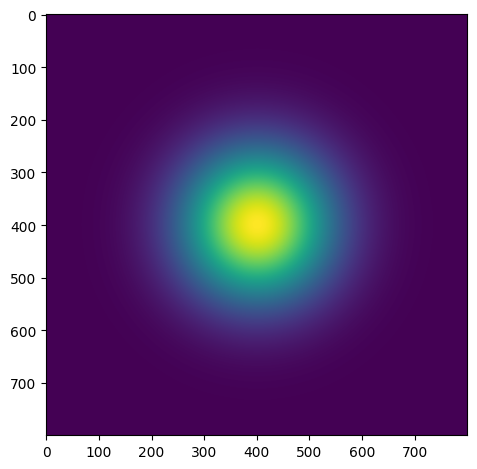

3

In [7]:
import matplotlib.pyplot as plt
plt.imshow(z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()
3

# **1.2 AI Task**

**Numpy and Matplotlib**

Prompt: Generate a Python script to plot a 2D Gaussian function using Numpy and Matplotlib

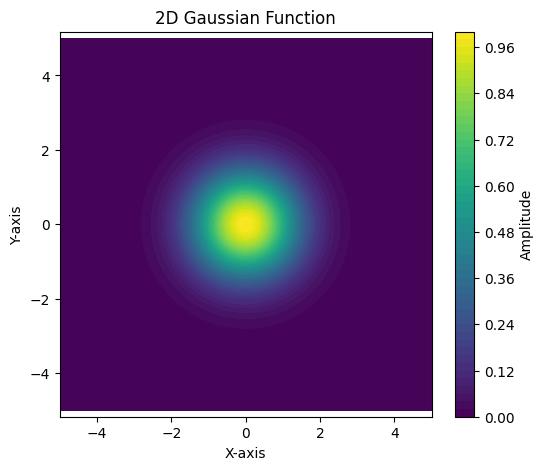

In [8]:
# 2D Gaussian function
def gaussian_2d(x, y, mu_x, mu_y, sigma_x, sigma_y):
    return np.exp(-(((x - mu_x)**2) / (2 * sigma_x**2) +
                    ((y - mu_y)**2) / (2 * sigma_y**2)))

# Grid settings
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)

# Gaussian parameters
mu_x, mu_y = 0, 0       # Mean
sigma_x, sigma_y = 1, 1 # Standard deviations

# Compute Gaussian values
Z = gaussian_2d(X, Y, mu_x, mu_y, sigma_x, sigma_y)

# Plot
plt.figure(figsize=(6, 5))
contour = plt.contourf(X, Y, Z, levels=50, cmap="viridis")
plt.colorbar(contour, label="Amplitude")
plt.title("2D Gaussian Function")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis("equal")
plt.show()


**PyTorch and Tensors**

Prompt: Now convert the python script using Pytorch and to use it tensors instead of numpy

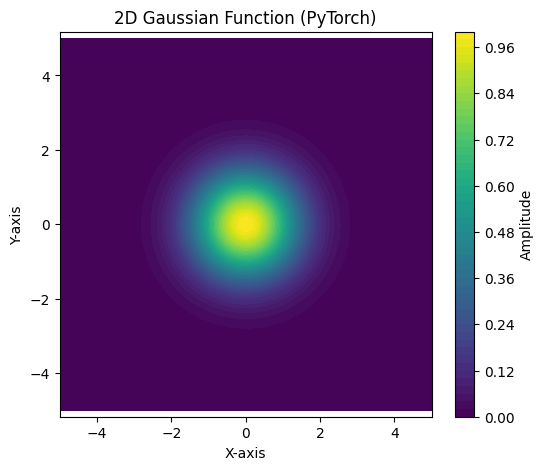

In [9]:
# 2D Gaussian function (PyTorch)
def gaussian_2d(x, y, mu_x, mu_y, sigma_x, sigma_y):
    return torch.exp(-(((x - mu_x) ** 2) / (2 * sigma_x ** 2) +
                       ((y - mu_y) ** 2) / (2 * sigma_y ** 2)))

# Grid settings
x = torch.linspace(-5, 5, 200)
y = torch.linspace(-5, 5, 200)
X, Y = torch.meshgrid(x, y, indexing="xy")

# Gaussian parameters
mu_x, mu_y = 0.0, 0.0       # Mean
sigma_x, sigma_y = 1.0, 1.0 # Standard deviations

# Compute Gaussian values
Z = gaussian_2d(X, Y, mu_x, mu_y, sigma_x, sigma_y)

# Convert tensors to numpy for plotting
X_np = X.numpy()
Y_np = Y.numpy()
Z_np = Z.numpy()

# Plot
plt.figure(figsize=(6, 5))
contour = plt.contourf(X_np, Y_np, Z_np, levels=50, cmap="viridis")
plt.colorbar(contour, label="Amplitude")
plt.title("2D Gaussian Function (PyTorch)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis("equal")
plt.show()


# **1.3 Demonstration**

Prompt: - Please create the plotting for this sine_2D function (show code)
        - how to plot the stripe visualization


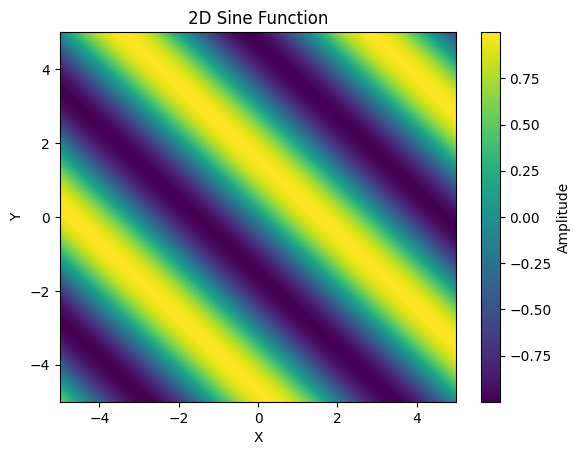

In [19]:
def sine_2d(x, y):
    return torch.sin(x + y)


x = torch.linspace(-5, 5, 200)
y = torch.linspace(-5, 5, 200)
X, Y = torch.meshgrid(x, y)

X = torch.Tensor(X)
Y = torch.Tensor(Y)
X, Y,= X.to(device), Y.to(device)

Z = sine_2d(X, Y)

Z_np = Z.numpy()

# Plot
plt.imshow(
    Z_np,
    extent=(x.min(), x.max(), y.min(), y.max()),
    origin='lower',
    cmap='viridis',
    aspect='auto'
)
plt.colorbar(label="Amplitude")
plt.title("2D Sine Function")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


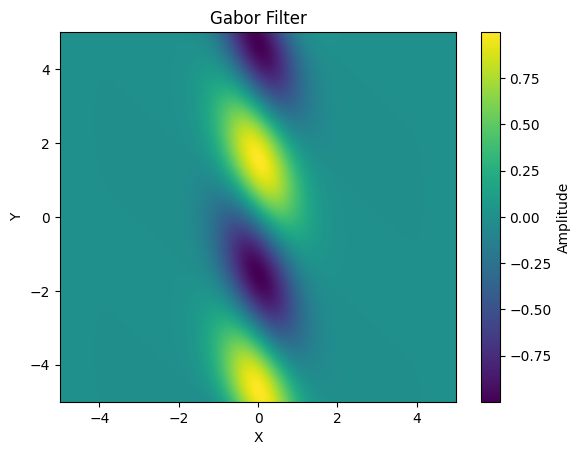

In [24]:
x = torch.linspace(-5, 5, 200)
y = torch.linspace(-5, 5, 200)
X, Y = torch.meshgrid(x, y)

X, Y = torch.Tensor(X), torch.Tensor(Y)
X, Y = X.to(device), Y.to(device)

W = sine_2d(X, Y) * torch.exp(-(x**2+y**2)/2.0)
W_np = W.numpy()

plt.imshow(
    W_np,
    extent=(x.min(), x.max(), y.min(), y.max()),
    origin='lower',
    cmap='viridis',
    aspect='auto',
)
plt.colorbar(label="Amplitude")
plt.title("Gabor Filter")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


When I multiply a 2D Gaussian with a sine function and visualize it, I get a Gabor function. The Gaussian acts as an envelope, localizing the pattern in space so it fades smoothly toward the edges. The sine provides the oscillatory pattern — the “stripes” or waves. The multiplication means that the stripes are strongest at the center (where the Gaussian is highest) and diminish gradually to zero outward.
In this plot:

*   The middle image is the infinite sine stripes pattern.
*   The right image is the Gaussian × sine, where the stripes exist only in the
*   center and fade out — creating a “windowed” wave pattern.

This is exactly the mathematical basis of a Gabor filter, often used in computer vision for edge detection, texture analysis, and pattern recognition.

# **2.1 Task**

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(200):
  #Compute the new values of z: z^2 + x
  zs_ = zs*zs + z
  #Have we diverged with this new value?
  not_diverged = torch.abs(zs_) < 4.0
  #Update variables to compute
  ns += not_diverged
  zs = zs_

/var/folders/0v/dyf6k9652f7579bg2ljm6fvr0000gn/T/ipykernel_16627/1458046194.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


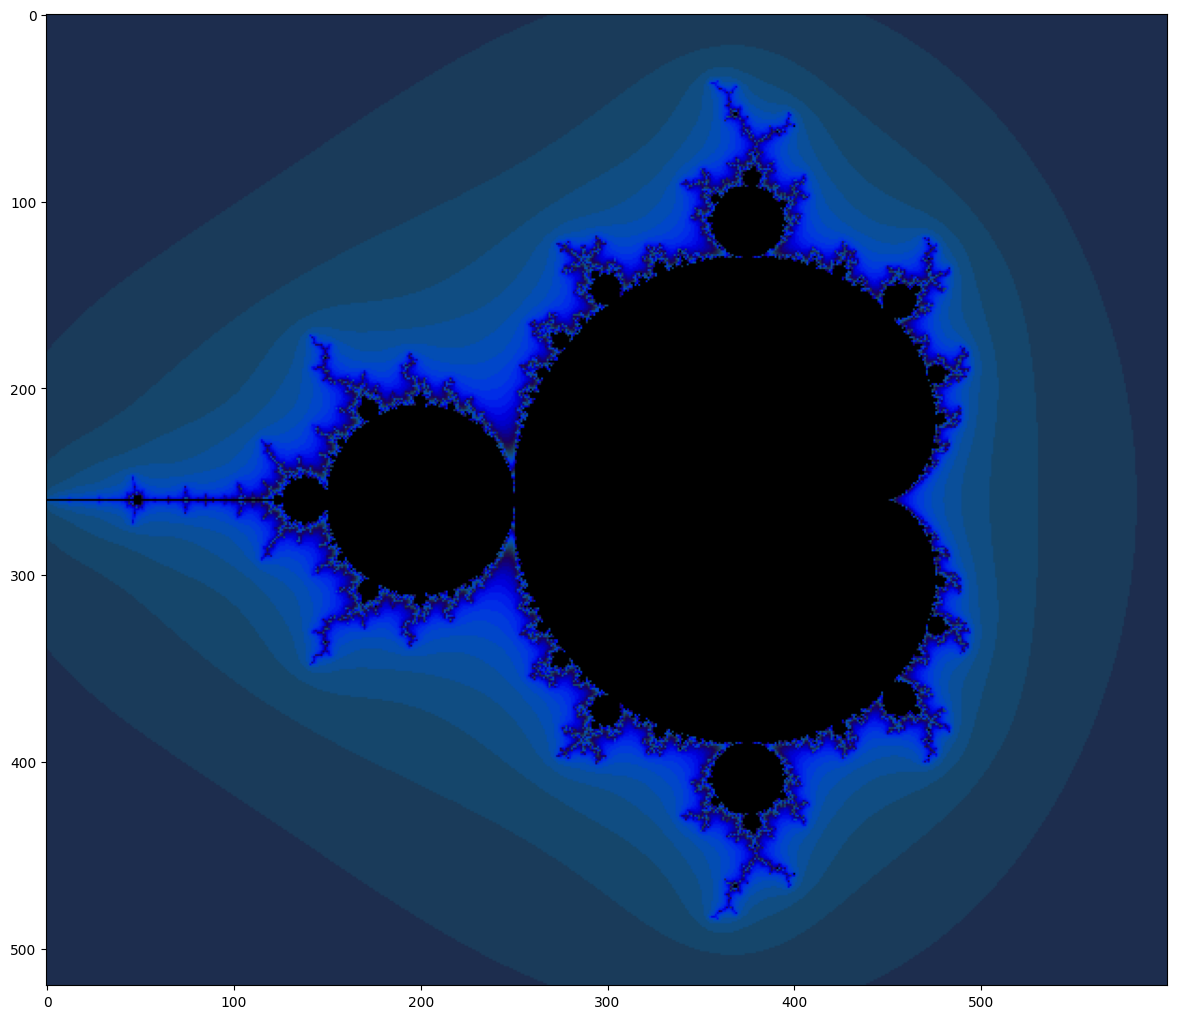

In [13]:
fig = plt.figure(figsize=(16,10))

def processFractal(a):
  """Display an array of iteration counts as a
  colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
  30+50*np.sin(a_cyclic),
  155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

# **2.2 AI Tasks**

Prompt: create a python script to generate a Mandelbrot set implemented in PyTorch and that runs  on the GPU (i.e. seems to run fast and allows fast rendering)

There is no issue for this prompt as it's give a great code with comphrehensive details

Using device: cpu


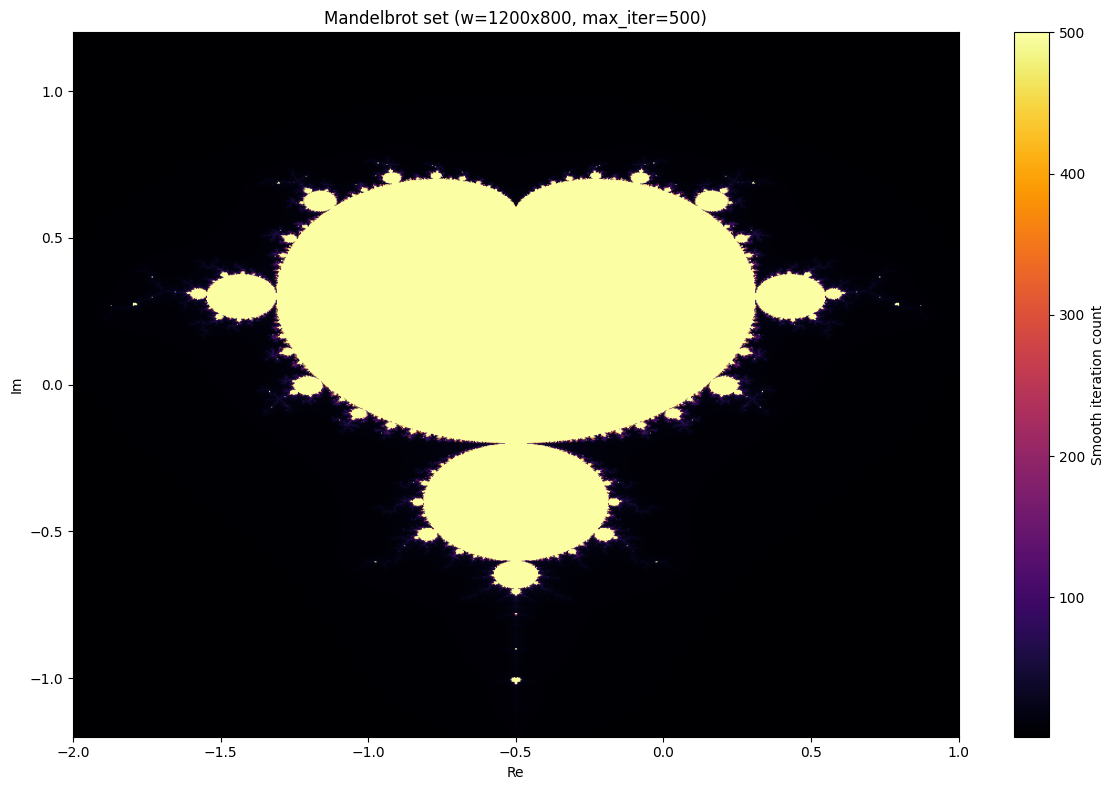

In [14]:
import math
import torch
import matplotlib.pyplot as plt

def mandelbrot_torch(xmin=-2.0, xmax=1.0, ymin=-1.5, ymax=1.5,
                     width=1024, height=1024, max_iter=200,
                     device=None):
    """
    Compute Mandelbrot set escape times using PyTorch (GPU if available).

    Returns:
      - img: 2D float32 tensor (height x width) with smooth iteration counts.
      - extent: tuple for matplotlib imshow: (xmin, xmax, ymin, ymax)
    """
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    dtype = torch.float32

    # Create grid of complex points (c = x + i*y)
    re = torch.linspace(xmin, xmax, width, device=device, dtype=dtype)
    im = torch.linspace(ymin, ymax, height, device=device, dtype=dtype)
    c_re, c_im = torch.meshgrid(re, im, indexing="xy")  # shapes: (width, height)
    # transpose to (height, width)
    c_re = c_re.t()
    c_im = c_im.t()

    # Initialize z = 0
    z_re = torch.zeros_like(c_re, device=device)
    z_im = torch.zeros_like(c_im, device=device)

    # Masks and storage for escape information
    alive = torch.ones_like(c_re, dtype=torch.bool, device=device)  # still iterating
    escape_iter = torch.full_like(c_re, float(max_iter), dtype=dtype, device=device)  # default = max_iter
    escape_mag2 = torch.full_like(c_re, float('inf'), dtype=dtype, device=device)

    # Iteration loop (vectorized)
    for i in range(max_iter):
        # compute z^2: (a+ib)^2 = a^2 - b^2 + i*2ab
        z_re2 = z_re * z_re
        z_im2 = z_im * z_im
        z_re_im = z_re * z_im

        # update z where alive
        new_re = z_re2 - z_im2 + c_re
        new_im = 2.0 * z_re_im + c_im

        z_re = torch.where(alive, new_re, z_re)
        z_im = torch.where(alive, new_im, z_im)

        # magnitude squared
        mag2 = z_re * z_re + z_im * z_im

        # find newly escaped
        escaped_now = alive & (mag2 > 4.0)
        if escaped_now.any():
            # store iteration and magnitude^2 for smooth coloring
            escape_iter[escaped_now] = float(i)
            escape_mag2[escaped_now] = mag2[escaped_now]

        # update alive mask
        alive = alive & (mag2 <= 4.0)

        # small optimization: break early if all escaped
        if not alive.any():
            break

    # Smooth coloring:
    # For points that escaped, compute continuous iteration count:
    # nu = n + 1 - log(log(|z|))/log(2)  (using escape_mag2 saved)
    # For points that never escaped, leave at max_iter (or set to 0 to mark inside set)
    eps = 1e-12
    # make a copy to keep original if needed
    smooth = escape_iter.clone()
    escaped_mask = escape_mag2 != float('inf')
    if escaped_mask.any():
        mag = torch.sqrt(escape_mag2[escaped_mask].clamp(min=eps))
        nu = escape_iter[escaped_mask] + 1 - torch.log(torch.log(mag)) / math.log(2.0)
        smooth[escaped_mask] = nu

    # Optionally make interior points equal to max_iter (already set), or set to 0
    # smooth[~escaped_mask] = 0.0

    # Move to CPU for plotting (as numpy)
    img = smooth.to("cpu")

    return img, (xmin, xmax, ymin, ymax)


if __name__ == "__main__":
    # Parameters
    width, height = 1200, 800  # resolution
    max_iter = 500
    # region to render (try different centers/zoom)
    xmin, xmax = -2.0, 1.0
    ymin, ymax = -1.2, 1.2

    # choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Using device:", device)

    # Compute Mandelbrot
    img, extent = mandelbrot_torch(xmin, xmax, ymin, ymax,
                                   width=width, height=height,
                                   max_iter=max_iter, device=device)

    # Normalize image for nice colormapping
    # Clip values and scale to [0, 1]
    img_np = img.numpy()
    # Mask interior points (didn't escape) for coloring — optional:
    inside_mask = img_np >= float(max_iter - 1e-6)  # those that didn't escape
    # For plotting, set interior to max value (so they appear dark in many colormaps)
    img_plot = img_np.copy()
    img_plot[inside_mask] = img_plot.max()

    # Display
    plt.figure(figsize=(12, 8))
    plt.imshow(img_plot, extent=extent, origin="lower", cmap="inferno", aspect="auto")
    plt.title(f"Mandelbrot set (w={width}x{height}, max_iter={max_iter})")
    plt.xlabel("Re")
    plt.ylabel("Im")
    plt.colorbar(label="Smooth iteration count")
    plt.tight_layout()
    plt.show()


# **2.3 Demonstration**

Prompt: how to get the seahorse valley by just chaning the mgrid value

/var/folders/0v/dyf6k9652f7579bg2ljm6fvr0000gn/T/ipykernel_16627/1193428948.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


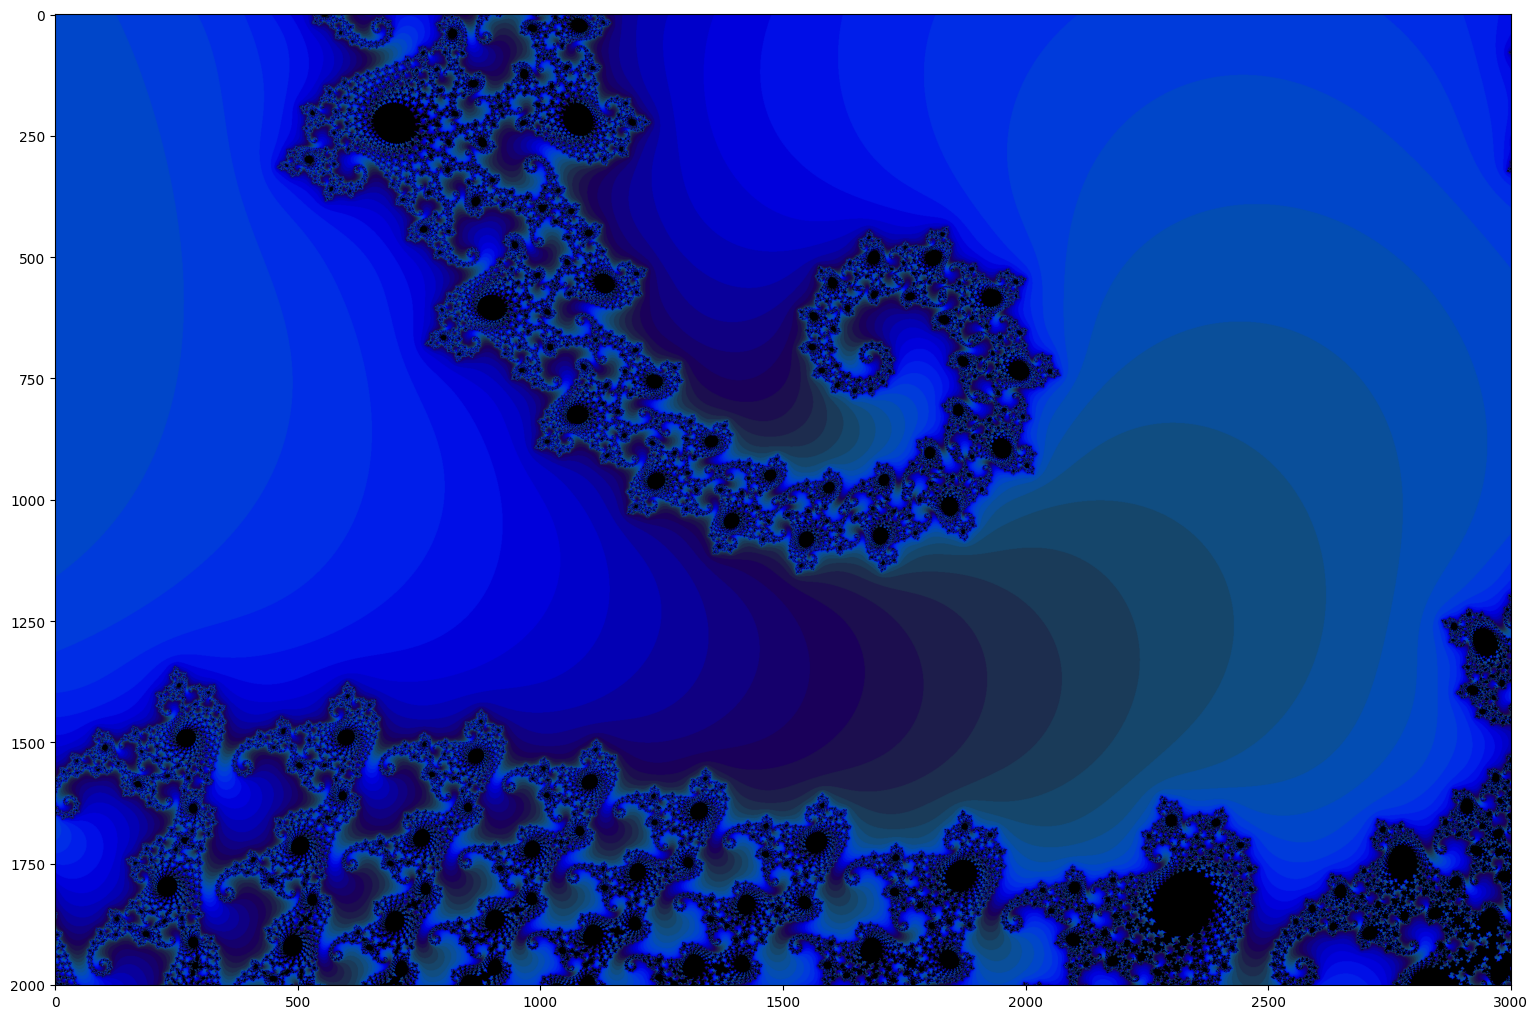

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Y, X = np.mgrid[0.129825904:0.133825904:0.000002, -0.746643887:-0.740643887:0.000002]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(200):
  #Compute the new values of z: z^2 + x
  zs_ = zs*zs + z
  #Have we diverged with this new value?
  not_diverged = torch.abs(zs_) < 4.0
  #Update variables to compute
  ns += not_diverged
  zs = zs_
  

def processFractal(a):
  """Display an array of iteration counts as a
  colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
  30+50*np.sin(a_cyclic),
  155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  return a

fig = plt.figure(figsize=(16,10))
plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

Prompt: how to get a julia set by using the mandelbrot set

/var/folders/0v/dyf6k9652f7579bg2ljm6fvr0000gn/T/ipykernel_16627/2924984339.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


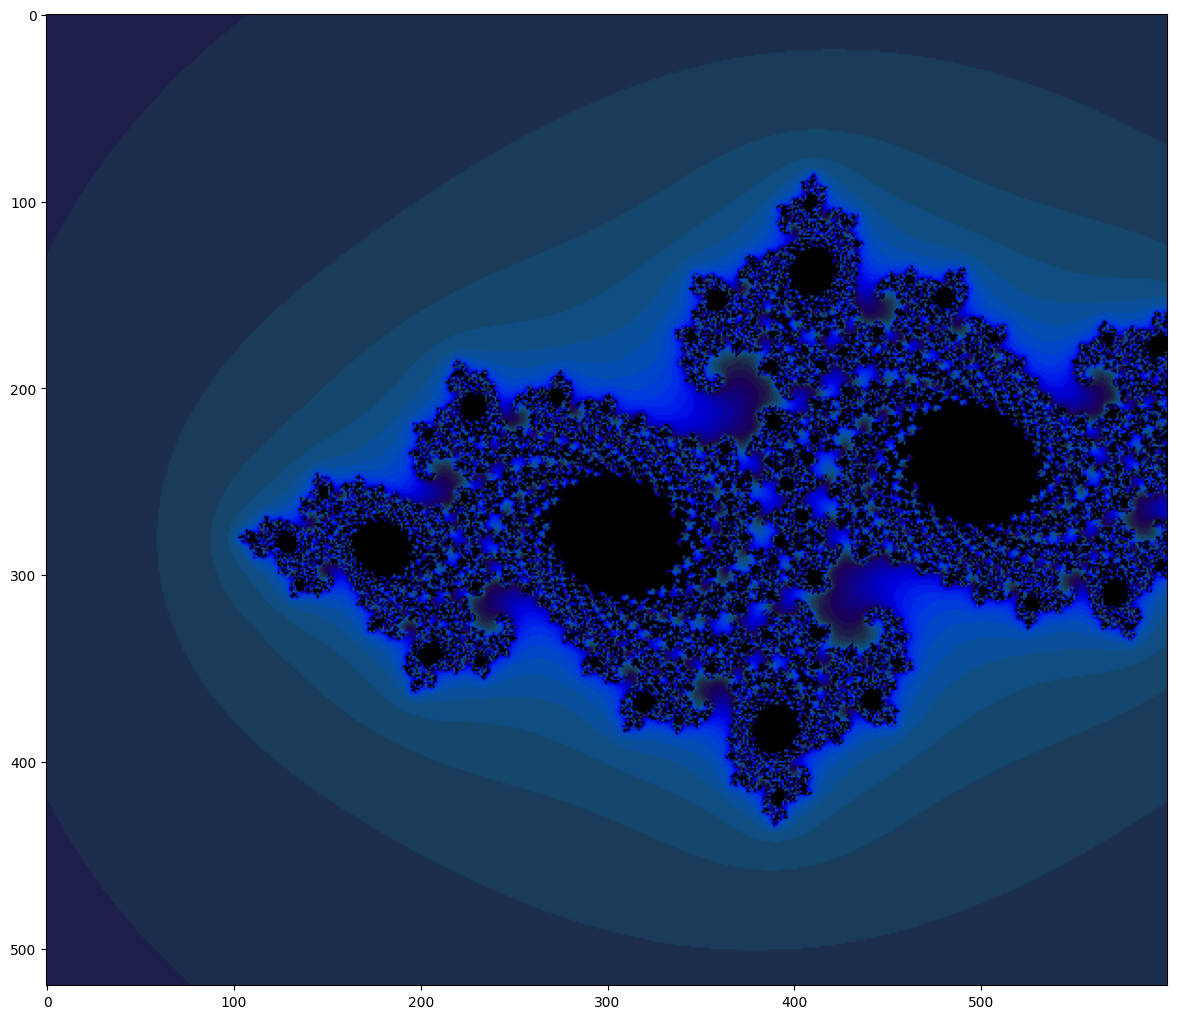

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
c = torch.tensor(complex(-0.7269, 0.1889), dtype=torch.complex64).to(device) # constant complex number
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Julia Set
for i in range(200):
  #Compute the new values of z: z^2 + x
  zs_ = zs*zs + c
  #Have we diverged with this new value?
  not_diverged = torch.abs(zs_) < 4.0
  #Update variables to compute
  ns += not_diverged
  zs = zs_
  

def processFractal(a):
  """Display an array of iteration counts as a
  colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
  30+50*np.sin(a_cyclic),
  155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  return a

fig = plt.figure(figsize=(16,10))
plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

# **3.3 Task**